In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

We want to solve the ODE
$$
    \frac{d^2y}{dt^2} = -g
$$
for the given boundary conditions that:
\begin{align*}
    y(0) &= 30\\
    y(4) &= 0
\end{align*}

Text(0.5, 1.0, 'Solution for different guess velocities')

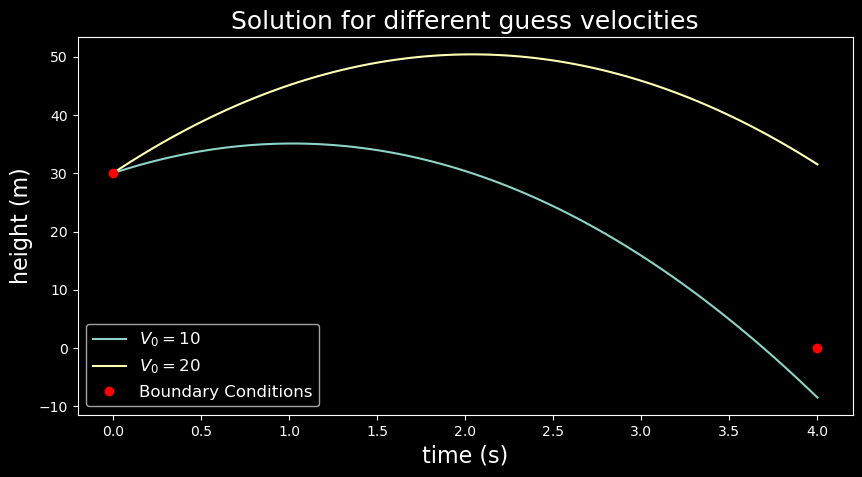

In [27]:
# defining constants
g = 9.81 # m/s^2: gravitational acceleration

# defining initial conditions
y0 = 30.0 # initial height
yE = 0.0  # final height of the projectile

# defining function for system of ODEs
def derivs(t,s):
    """
    Function for the system of ODEs
    dy/dt = v
    dv/dt = -g
    
    Parameters
    ----------
    t : time (float)
    s : state vector  (float)
        s[0] = y(t)
        s[1] = dy/dt == v(t)
    """
    y = s[0]
    v = s[1]
    return [v, -g]

# defining time interval
t0 = 0.0
tE = 4.0
teval = np.linspace(t0,tE,100)

## solving ODEs using shooting method
vGuess = [10,20] # guess velocity
plt.figure(figsize = (10, 5), dpi=100)

# solving for differnet guess velocities
for vG in vGuess:
    sol = solve_ivp(derivs,[t0,tE],[y0,vG],t_eval=teval)

    plt.plot(sol.t, sol.y[0], label='$V_0=%2d$'%vG)
    
plt.plot([0,4], [30,0], 'ro', label='Boundary Conditions')

plt.legend(fontsize=12)
plt.xlabel('time (s)', fontsize=16)
plt.ylabel('height (m)', fontsize=16)
plt.title('Solution for different guess velocities', fontsize=18)



In [10]:
## getting accurate velocity using root finding approach

# defining objective function as a function of guess velocity
def objective(v):
    sol = solve_ivp(derivs,[t0,tE],np.array([y0,v], dtype='object'),t_eval=teval)
    end_point = sol.y[0][-1]
    return end_point - yE

vRoot = fsolve(objective,vG)
print("Optimal velocity: %2.3f m/s"%vRoot)


Optimal velocity: 12.120 m/s


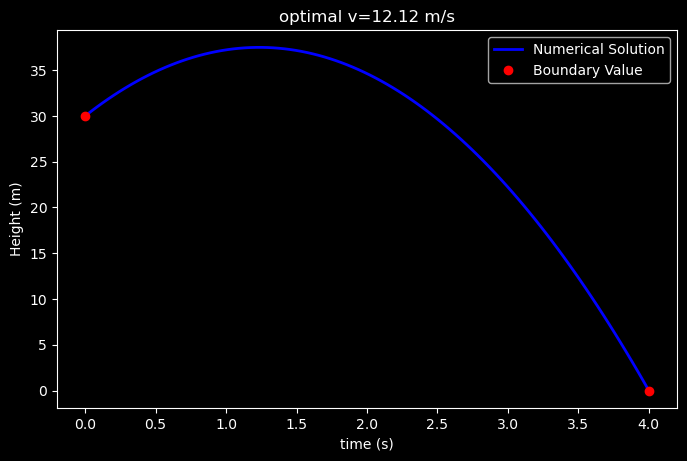

In [20]:
# plotting optimal solution
sol = solve_ivp(derivs,[t0,tE],np.array([y0,vRoot], dtype='object'),t_eval=teval)

plt.figure(figsize = (8, 5), dpi=100)
plt.plot(sol.t, sol.y[0],c='blue',lw=2, label='Numerical Solution')
plt.plot([0,4], [30,0], 'ro', label='Boundary Value')

plt.legend(loc='best')
plt.xlabel('time (s)')
plt.ylabel('Height (m)')
plt.title(f'optimal v=%2.2f m/s'%vRoot);